In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pathlib
from matplotlib.lines import Line2D
from PIL import Image

%matplotlib inline


In [2]:
_METRICS_FILE = './files/benchmark'
_METRIC = 'test_time_s'

## Read file with metrics

In [3]:
try:
    #read csv file
    metrics = pd.read_csv(_METRICS_FILE+'.csv')
except OSError as err:
    # if there is no csv file we read the excel file
    excel_file = pd.read_excel(_METRICS_FILE+'.xlsx')
    # transform the excel file in a csv file
    excel_file.to_csv(_METRICS_FILE+'.csv', index=False)
    # read the new csv file 
    metrics = pd.read_csv(_METRICS_FILE+'.csv')
except:
    print("ERROR WHILE READING METRICS FILE")


In [4]:
metrics['total_time_s'] = metrics.apply(lambda row: row['train_time_s']+row['test_time_s'], axis=1)

In [5]:
metrics.sample(5)

,dataset,classifier,total,tp,tn,fp,fn,precision,recall,f1,fbeta,accuracy,train_time_s,test_time_s,total_time_s
477,ECG5000,MOA_OzaBagAdwin,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.893461,3.196958,1.693079,4.890036
1386,NonInvasiveFetalECGThorax2,sklearn_BernoulliNB,3755.0,0.000000,0.619681,0.000000,0.000000,0.598426,0.592819,0.586448,0.586448,0.592819,2.040898,1.018477,3.059375
1274,MiddlePhalanxOutlineCorrect,sklearn_SGDClassifier,881.0,1.561798,3.719101,2.426966,2.191011,0.227278,0.420787,0.431073,0.263474,0.528090,0.015701,0.005754,0.021454
1098,Lightning2,sklearn_PassiveAggressiveClassifier,111.0,3.916667,1.666667,1.916667,1.750000,0.639286,0.650496,0.546744,0.602904,0.558333,0.005956,0.003525,0.009481
994,InsectWingbeatSound,MOA_NaiveBayes,2200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.567468,0.008809,0.299677,0.308486


## Useful variables

In [6]:
family_label = {'NN'  : 'Neural_Network',
                'LM'  : 'Linear_Model',
                'NB'  : 'Naive_Bayes',
                'DC'  : 'Dummy_Classifier',
                'DT'  : 'Decision_Trees',
                'MC'  : 'Meta_Classifier',
               }
classifier_family = {'keras_parallel_3_Dilated_Conv':'NN',
                   'keras_3_Dilated_Conv':'NN',
                   'sklearn_MLPClassifier':'NN',
                   'sklearn_Perceptron':'LM',
                   'sklearn_SGDClassifier':'LM',
                   'sklearn_BernoulliNB':'NB',
                   'sklearn_PassiveAggressiveClassifier':'LM',
                   'MOA_MajorityClass':'DC',
                   'MOA_RandomHoeffdingTree':'DT',
                   'MOA_NaiveBayes':'NB',
                   'MOA_SPegasos':'LM',
                   'MOA_OzaBagAdwin':'MC',
                   'MOA_OzaBoost':'MC',
                   'MOA_OzaBag':'MC',
                   'MOA_OCBoost':'MC',
                   'MOA_SingleClassifierDrift':'MC',
                   'MOA_WeightedMajorityAlgorithm':'MC',
                   'MOA_OzaBoostAdwin':'MC',
                   'MOA_Perceptron':'LM',
                   'MOA_HoeffdingAdaptiveTree':'NB',
                   'MOA_HoeffdingOptionTree':'NB',
                   'MOA_LeveragingBag':'MC',
                   'MOA_DecisionStump':'DT',
                   'MOA_OzaBagASHT':'MC',
                   'MOA_SGD':'LM',
                   'MOA_AdaHoeffdingOptionTree':'DT',
                   'MOA_ASHoeffdingTree':'DT',
                   'MOA_ActiveClassifier':'DC',
                   'MOA_HoeffdingTree':'DT'
                  }
#classifier_family = {'keras_3_Dilated_Conv':'NN',
#                   'keras_parallel_3_Dilated_Conv':'NN'
#                  }

family_classifier = {l:[k for k,v in classifier_family.items() if v == l] for l in family_label.keys()}
family_color = {'NN'  : 'k',
                'LM'  : 'b',
                'NB'  : 'g',
                'DC'  : 'y',
                'DT'  : 'r',
                'MC'  : 'm',
               }
line_style = ['-','--', '-.', ':', '>-','o--', 'x-.', '^:', 'o-','x--', '^-.', '>:', 'x-','^--', '>-.', 'o:', '^-','>--', 'o-.', 'x:']
classifier_to_compare = ['keras_parallel_3_Dilated_Conv', 'keras_3_Dilated_Conv']


In [7]:
datasets = metrics['dataset'].unique()
classifiers = metrics['classifier'].unique()

In [8]:
directory = './files/'+_METRIC+'/'
directory = './files/'+_METRIC+'/'
pathlib.Path(directory).mkdir(parents=True, exist_ok=True)

## Estudio de los valores de _METRIC sin preprocesarlos

In [9]:
metrics_table = metrics.pivot(index='dataset',columns='classifier')[_METRIC]
metrics_table = metrics_table.dropna()
metrics_table = metrics_table[list(classifier_family.keys())]
print(metrics_table.shape)

# Add mean row and save to file
metrics_table.loc['mean'] = metrics_table.mean()
metrics_table.to_csv(directory+'table_'+_METRIC+'.csv')
metrics_table = metrics_table.drop(index='mean')

metrics_table.tail()


(93, 29)


classifier,keras_parallel_3_Dilated_Conv,keras_3_Dilated_Conv,sklearn_MLPClassifier,sklearn_Perceptron,sklearn_SGDClassifier,sklearn_BernoulliNB,sklearn_PassiveAggressiveClassifier,MOA_MajorityClass,MOA_RandomHoeffdingTree,MOA_NaiveBayes,...,MOA_HoeffdingAdaptiveTree,MOA_HoeffdingOptionTree,MOA_LeveragingBag,MOA_DecisionStump,MOA_OzaBagASHT,MOA_SGD,MOA_AdaHoeffdingOptionTree,MOA_ASHoeffdingTree,MOA_ActiveClassifier,MOA_HoeffdingTree
dataset,,,,,,,,,,,,,,,,,,,,,
ozone,2.650641,0.234053,0.029472,0.015654,0.015626,0.030404,0.015854,0.000087,0.000256,0.016791,...,0.001106,0.001146,0.094299,0.000218,0.012670,0.000486,0.001160,0.000834,0.046305,0.000862
pendigits,8.629531,0.797184,0.126329,0.060083,0.061301,0.122350,0.061238,0.000442,0.021268,0.089174,...,0.087253,0.090092,0.850353,0.000460,0.858083,0.000833,0.101754,0.080817,0.215323,0.082184
pokerhand,635.969437,62.989305,16.668450,4.748986,5.177384,8.901376,5.081473,0.028583,0.373324,3.354080,...,1.314980,4.775083,7.525320,0.047113,14.425975,0.048546,5.792921,1.130578,3.140954,1.132956
spambase,4.241285,0.380195,0.051820,0.027975,0.028034,0.054156,0.028294,0.000154,0.001663,0.019553,...,0.009622,0.019116,0.092877,0.000163,0.126299,0.000417,0.019421,0.011246,0.019284,0.012110
susy100k,75.017158,7.540950,1.057768,0.582069,0.571171,1.074644,0.586844,0.005711,0.025962,0.175015,...,0.064959,0.261645,0.779214,0.003720,1.204394,0.007377,0.346736,0.063523,0.178306,0.064543


In [10]:
color = [family_color[classifier_family[classifier]] for classifier in classifier_family.keys()]
line = [line_style[family_classifier[classifier_family[classifier]].index(classifier)] for classifier in classifier_family.keys()]
style = [c+s for c,s in list(zip(color,line))]

### Plot _METRIC for each dataset

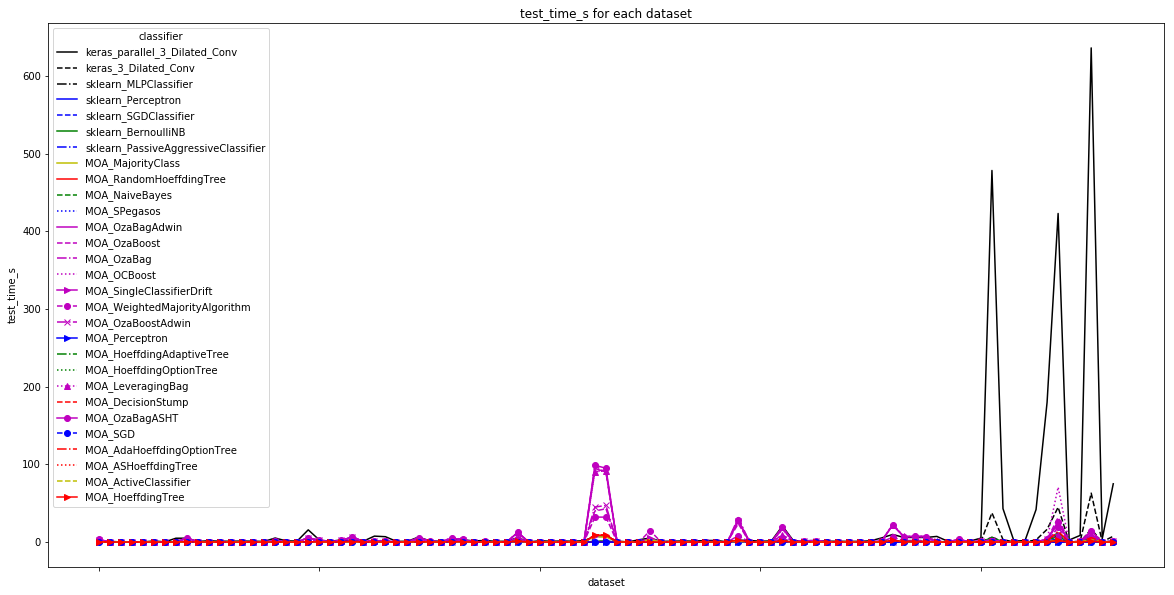

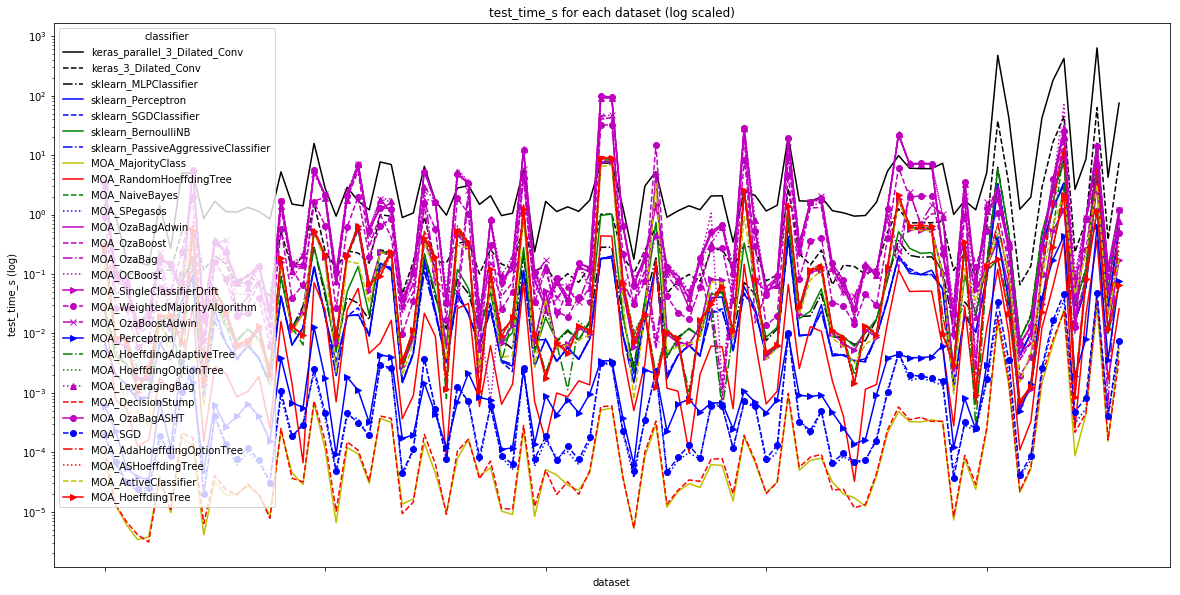

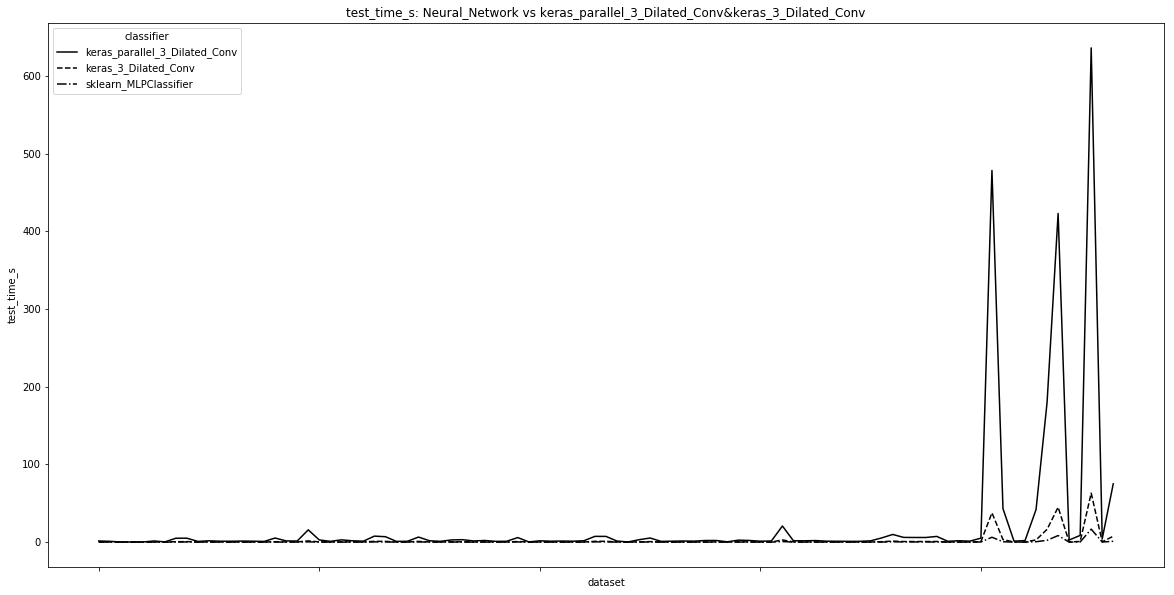

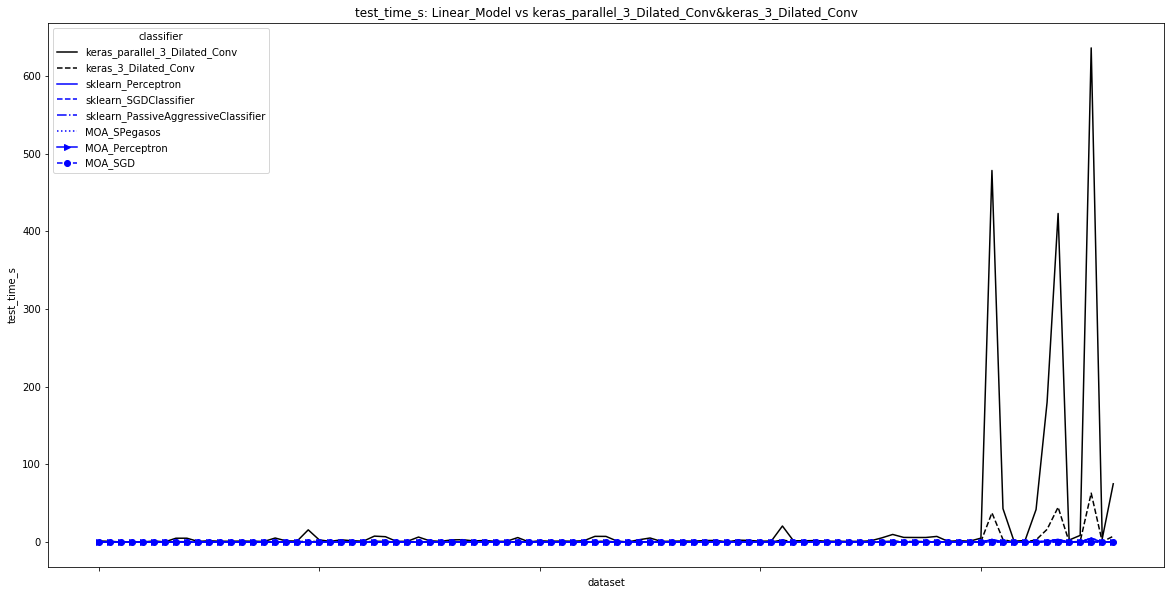

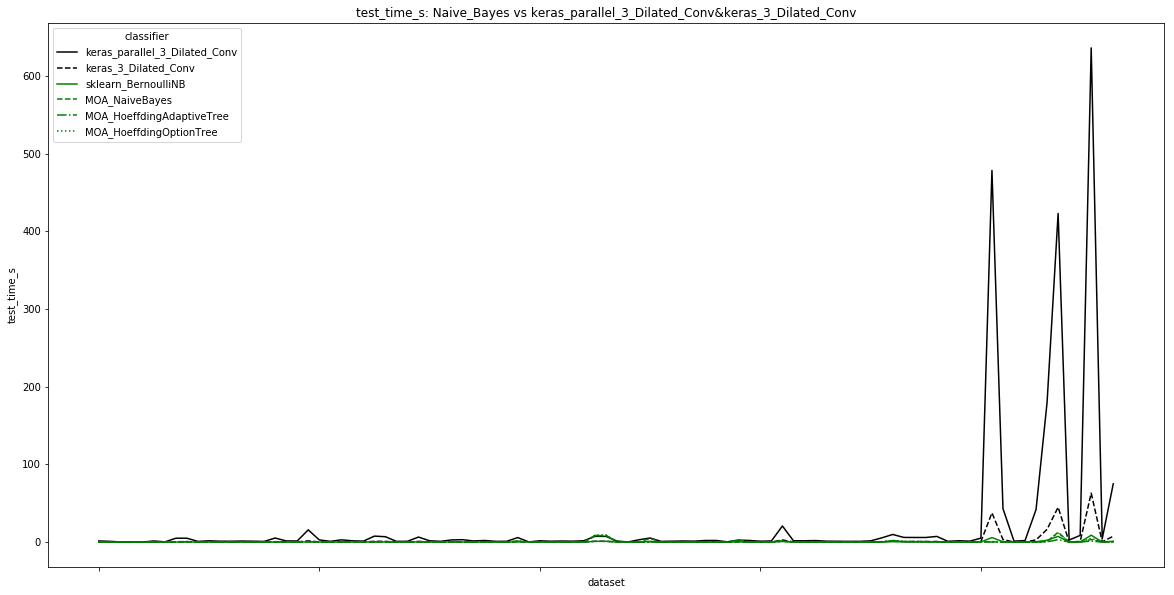

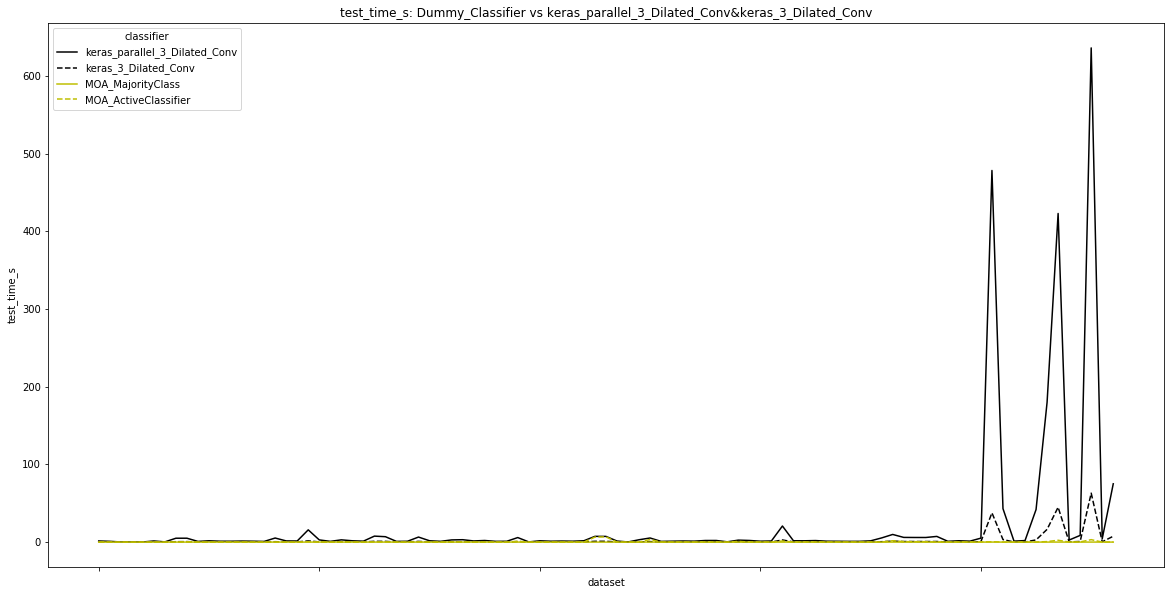

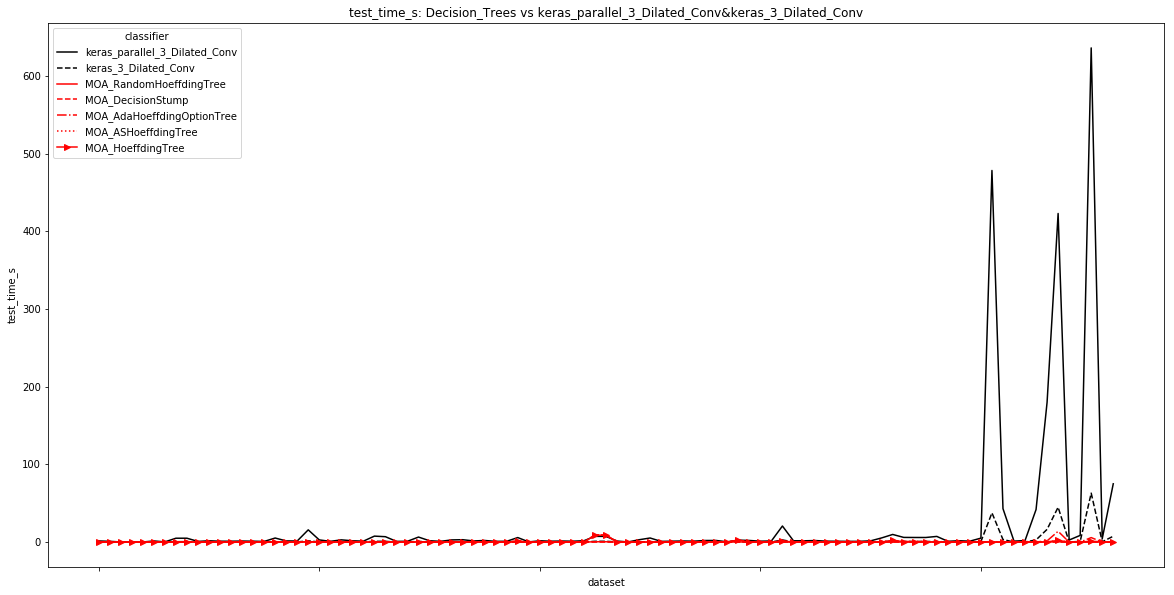

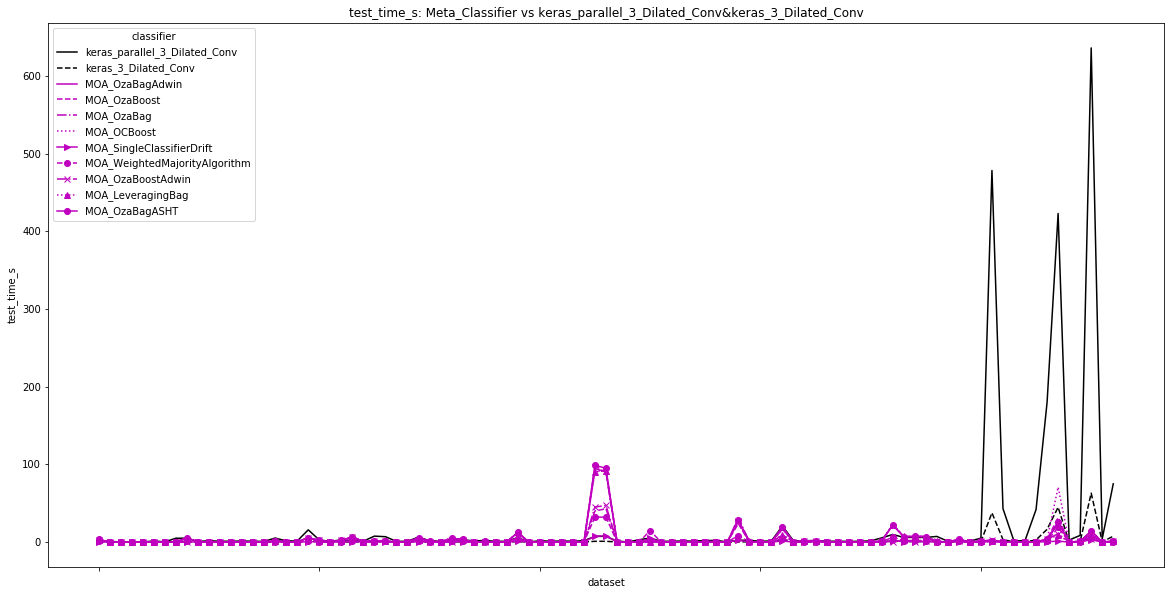

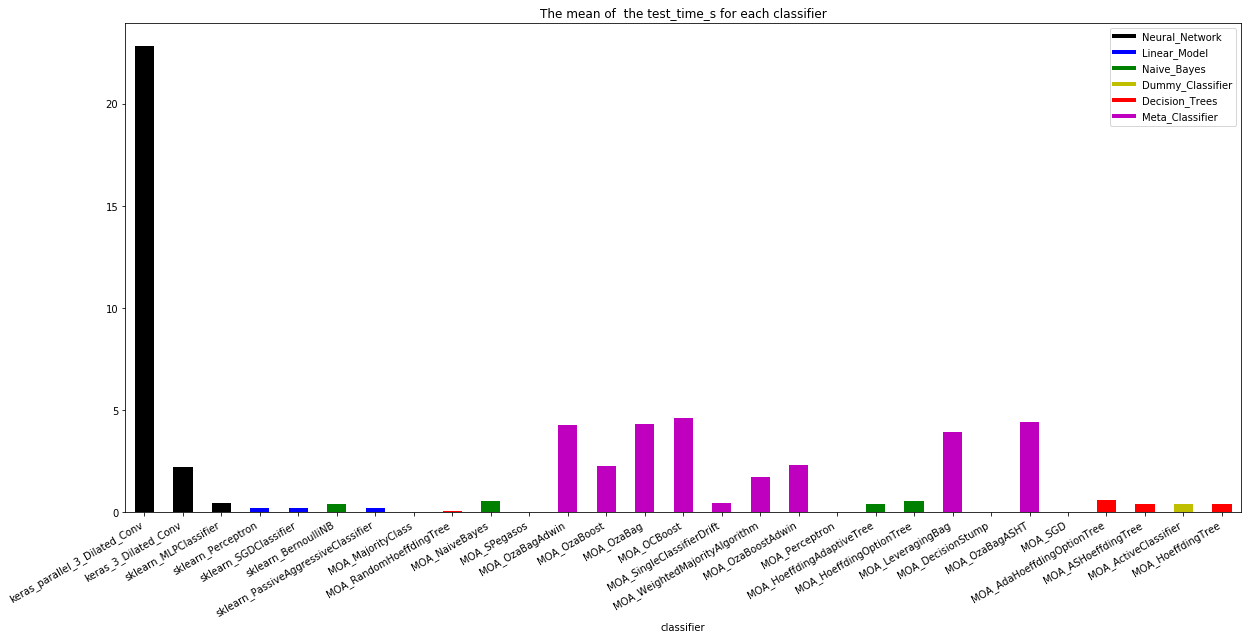

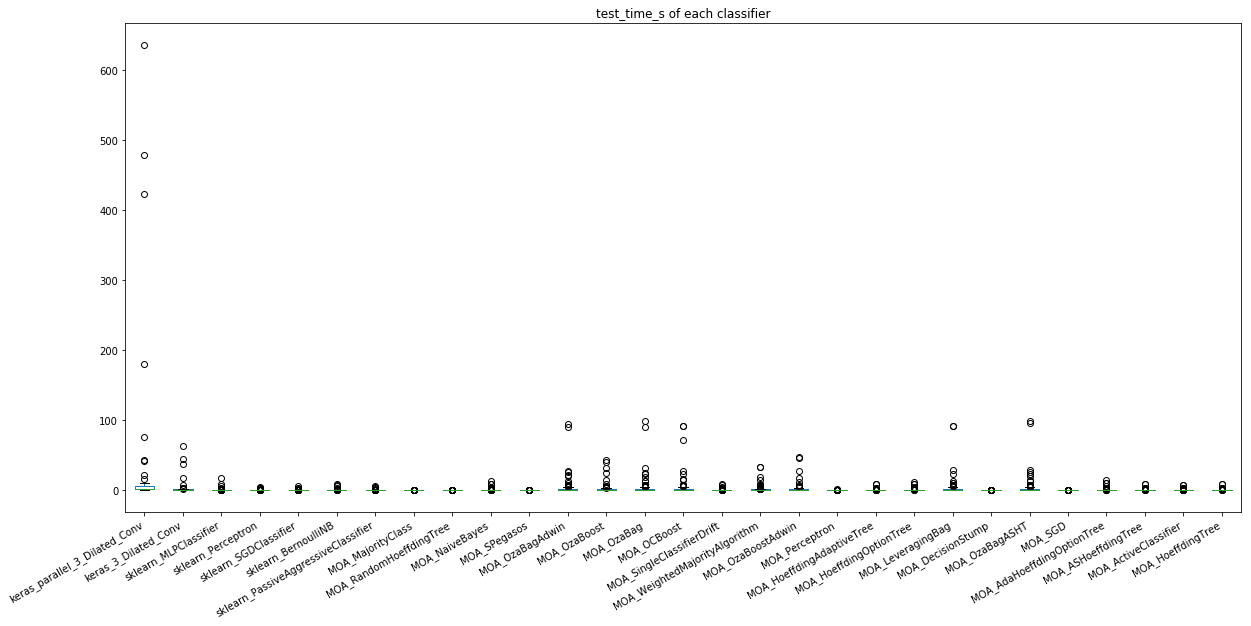

In [11]:
## Plot 
ax = metrics_table.plot(figsize=(20,10),   style=style, title= _METRIC+' for each dataset' )
ax.set_ylabel(_METRIC)
ax.get_figure().savefig(directory+'plot.png')
plt.show()

ax_log = metrics_table.plot(figsize=(20,10), logy=True,  style=style, title= _METRIC+' for each dataset (log scaled)' )
ax_log.set_ylabel(_METRIC+' (log)')
ax_log.get_figure().savefig(directory+'plot_log.png')
plt.show()

pdf_img_ls = [directory+'plot.png', directory+'plot_log.png' ]

for family in family_label.keys():
    classifiers_to_plot = [classifier for (classifier,f) in classifier_family.items() if f==family or classifier in classifier_to_compare]
    color_aux = [family_color[classifier_family[classifier]] for classifier in classifiers_to_plot]
    line_aux = [line_style[family_classifier[classifier_family[classifier]].index(classifier)] for classifier in classifiers_to_plot]
    style_aux = [c+s for c,s in list(zip(color_aux,line_aux))]
    metrics_table_aux = metrics_table[classifiers_to_plot]
    ax = metrics_table_aux.plot(figsize=(20,10), style=style_aux, title= _METRIC+': '+family_label[family]+' vs '+'&'.join(classifier_to_compare) )
    ax.set_ylabel(_METRIC)
    ax.get_figure().savefig(directory + 'plot_' + family +'.png')
    plt.show()
    pdf_img_ls.append(directory + 'plot_' + family +'.png')


## Bar plot (mean)
legend = [Line2D([0], [0], color=c, lw=4, label=family_label[f]) for f,c in family_color.items()]

ax = metrics_table.mean().plot.bar(figsize=(20,10), color=color, title= 'The mean of  the '+_METRIC+' for each classifier')
ax.legend(handles=legend)
ax.get_figure().autofmt_xdate()
ax.get_figure().savefig(directory+'mean.png')
plt.show()
pdf_img_ls = pdf_img_ls + [directory+'mean.png']
                           
#ax_log = metrics_table.mean().plot.bar(figsize=(20,10), color=color, logy=True, title= 'The mean of  the  '+_METRIC+' for each classifier (log scaled)')
#ax_log.legend(handles=legend)
#ax_log.get_figure().autofmt_xdate()
#ax_log.get_figure().savefig(directory+'mean_log.png')
#plt.show()
#pdf_img_ls = pdf_img_ls + [directory+'mean_log.png']

## Box Plot 
ax = metrics_table.plot.box(figsize=(20,10), title= _METRIC+' of each classifier')
ax.get_figure().autofmt_xdate()
ax.get_figure().savefig(directory+'box.png')
plt.show()
pdf_img_ls = pdf_img_ls + [directory+'box.png']
                           
#ax_log = metrics_table.plot.box(figsize=(20,10), logy=True, title= _METRIC+'  of each classifier (log scaled)')
#ax_log.get_figure().autofmt_xdate()
#ax_log.get_figure().savefig(directory+'box_log.png')
#plt.show()
#pdf_img_ls = pdf_img_ls + [directory+'box_log.png']

In [12]:
pdf_img_ls = [Image.open(i).convert('RGB') for i in pdf_img_ls]
pdf_filename = directory+_METRIC+'.pdf'
first = pdf_img_ls[0].copy()
first.save(pdf_filename,"PDF", resolution=100.0, save_all=True, append_images=pdf_img_ls[1:])
pdf_img_ls = []

### We divide the value for each minimum

In [13]:
metrics_table_min = metrics_table.min(axis=1)
metrics_table_proportionate = metrics_table.divide(metrics_table_min, axis=0)

# Add mean row and save to file
metrics_table_proportionate.loc['mean'] = metrics_table_proportionate.mean()
metrics_table_proportionate.to_csv(directory+'table_'+_METRIC+'_prop.csv')
metrics_table_proportionate = metrics_table_proportionate.drop(index='mean')

metrics_table_proportionate.head()

classifier,keras_parallel_3_Dilated_Conv,keras_3_Dilated_Conv,sklearn_MLPClassifier,sklearn_Perceptron,sklearn_SGDClassifier,sklearn_BernoulliNB,sklearn_PassiveAggressiveClassifier,MOA_MajorityClass,MOA_RandomHoeffdingTree,MOA_NaiveBayes,...,MOA_HoeffdingAdaptiveTree,MOA_HoeffdingOptionTree,MOA_LeveragingBag,MOA_DecisionStump,MOA_OzaBagASHT,MOA_SGD,MOA_AdaHoeffdingOptionTree,MOA_ASHoeffdingTree,MOA_ActiveClassifier,MOA_HoeffdingTree
dataset,,,,,,,,,,,,,,,,,,,,,
Adiac,20356.938729,1710.630068,356.575889,97.496894,99.839101,400.644955,98.194858,1.000000,395.703818,4023.581807,...,4046.710616,4415.549746,43762.682200,1.528874,47268.636866,2.782241,4771.582553,4111.099506,2018.832430,3974.577107
ArrowHead,75369.769656,9809.646864,406.880584,155.164777,152.023124,317.270414,158.397757,1.000000,59.122118,553.843637,...,690.435226,645.246763,7279.733701,1.010189,7863.538727,5.258561,659.280778,648.964836,481.633035,650.284302
Beef,29038.728437,16943.332438,440.800350,229.783939,228.049125,513.189387,223.041823,1.000000,89.594179,986.251530,...,1319.992889,1270.493964,13085.528361,1.119563,10264.086324,5.347776,1480.901769,1264.329089,74.322474,1247.437738
BeetleFly,46266.290426,29532.973074,494.401896,217.214931,217.634805,366.760133,255.633422,1.000000,37.432052,527.698268,...,751.484297,324.773701,4045.592016,1.206340,4217.636337,7.101556,348.775462,309.850895,143.117405,307.785148
BirdChicken,45554.346141,32256.024477,532.265436,280.374706,273.985057,387.766995,266.594620,1.213432,52.438166,577.153051,...,676.434291,811.415241,6692.239587,1.000000,7591.958347,8.275105,851.390378,793.597029,86.849209,835.712948


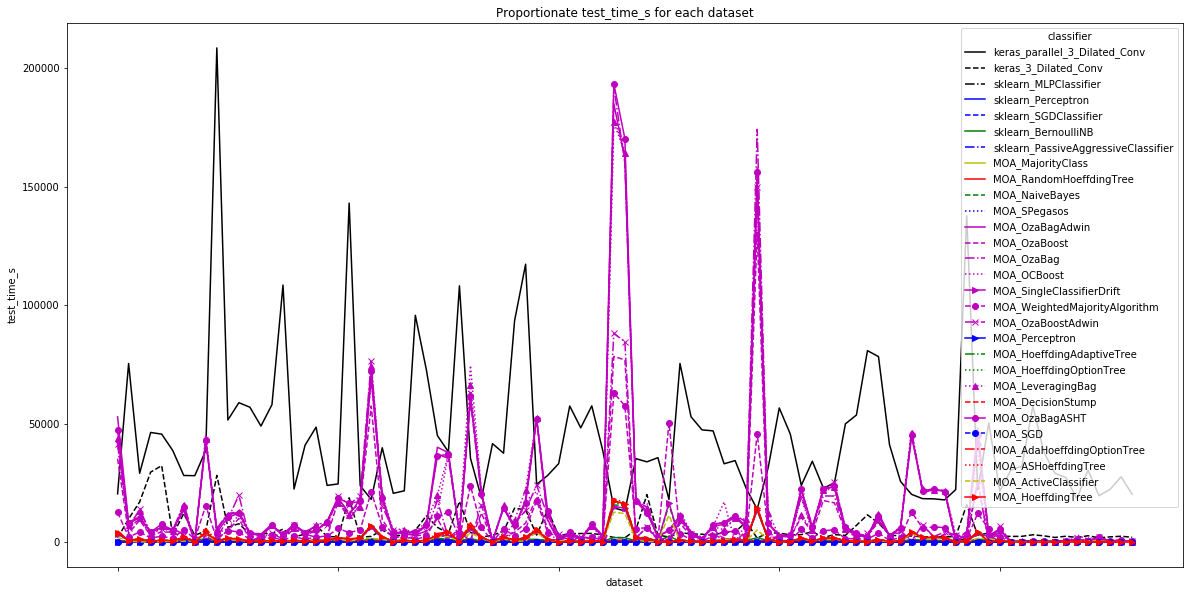

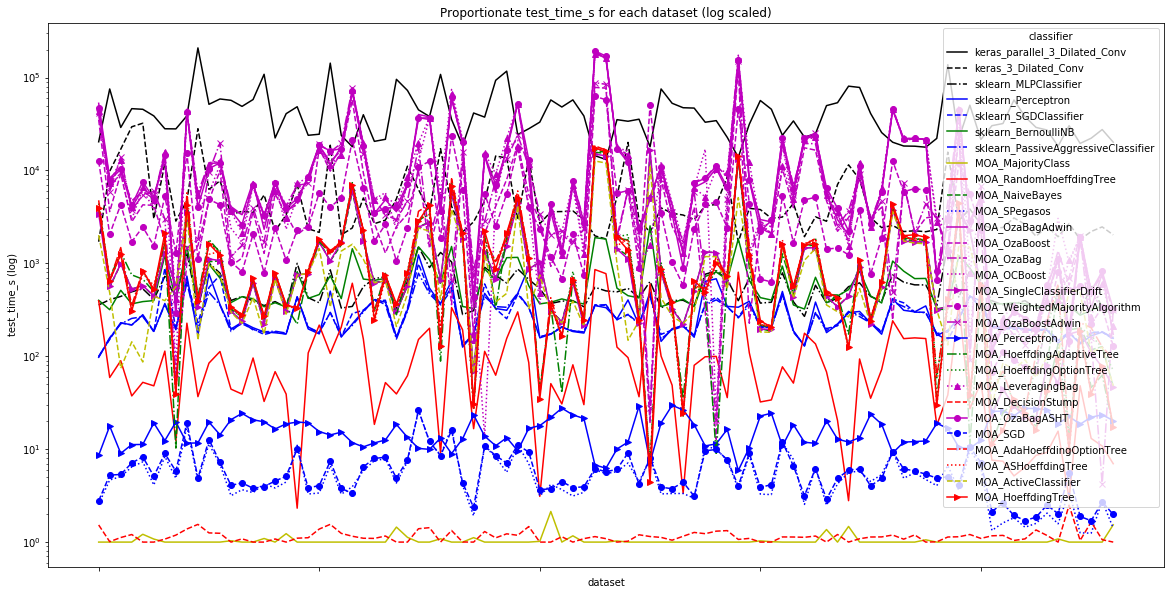

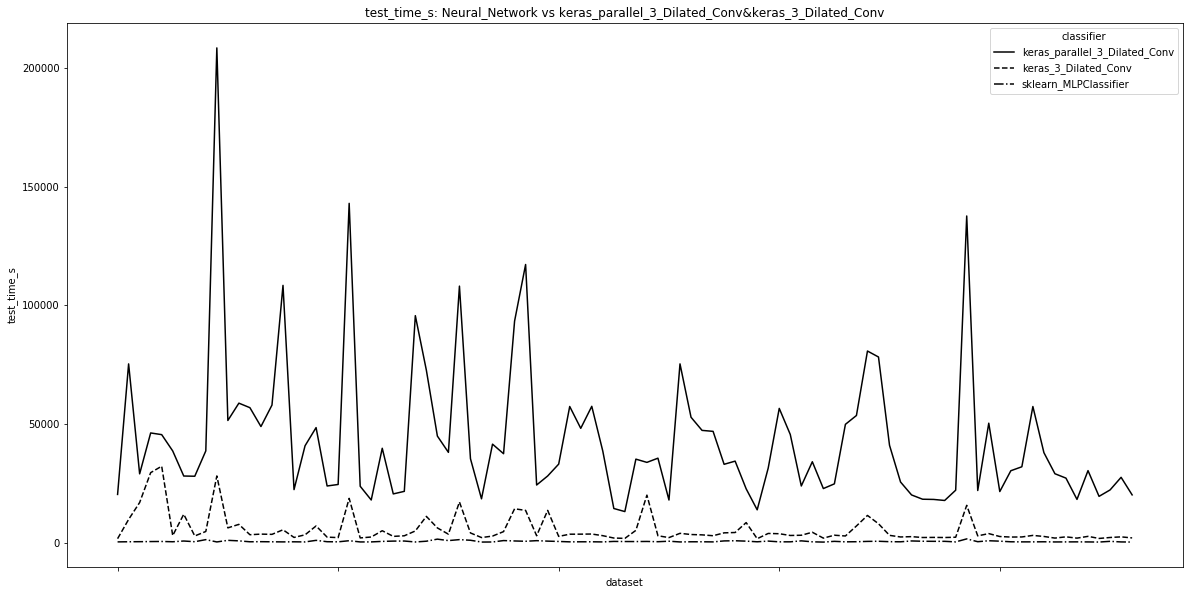

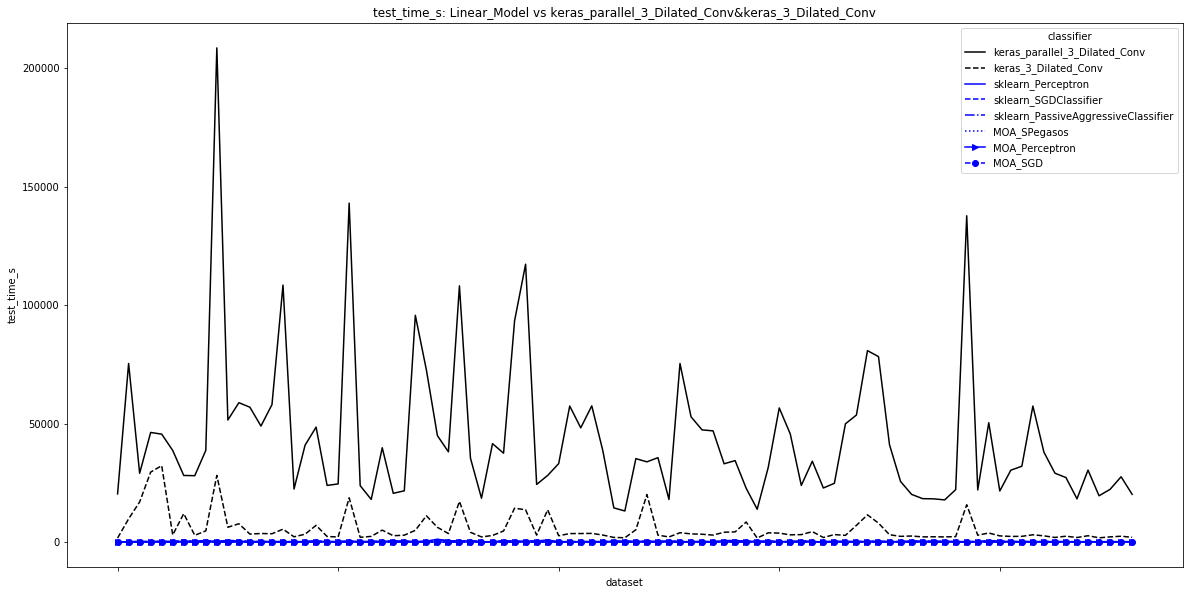

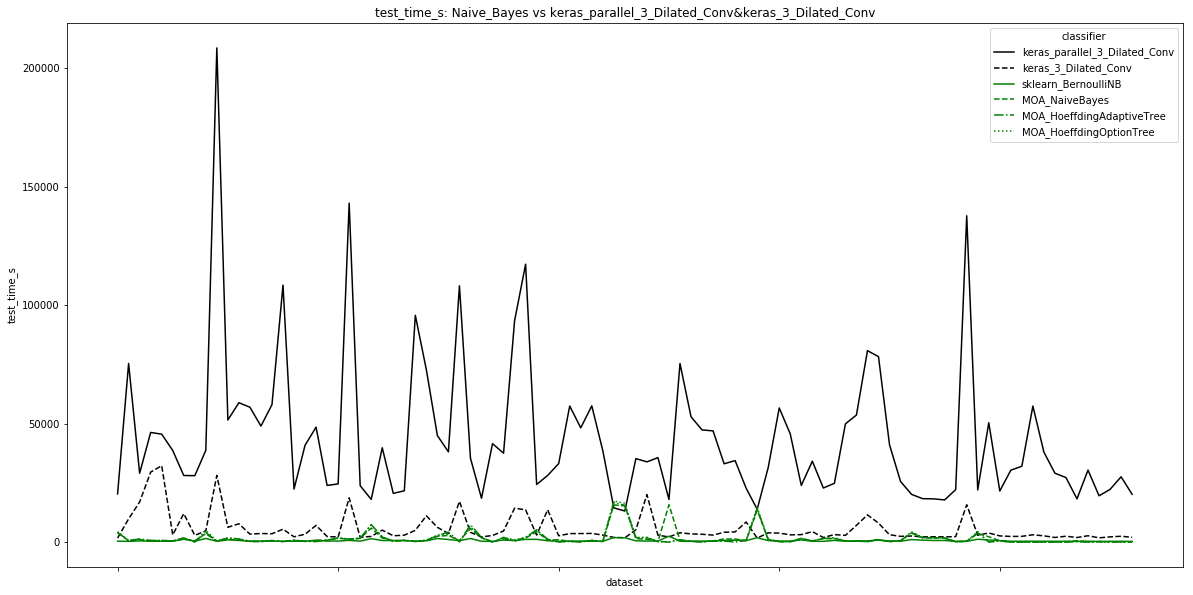

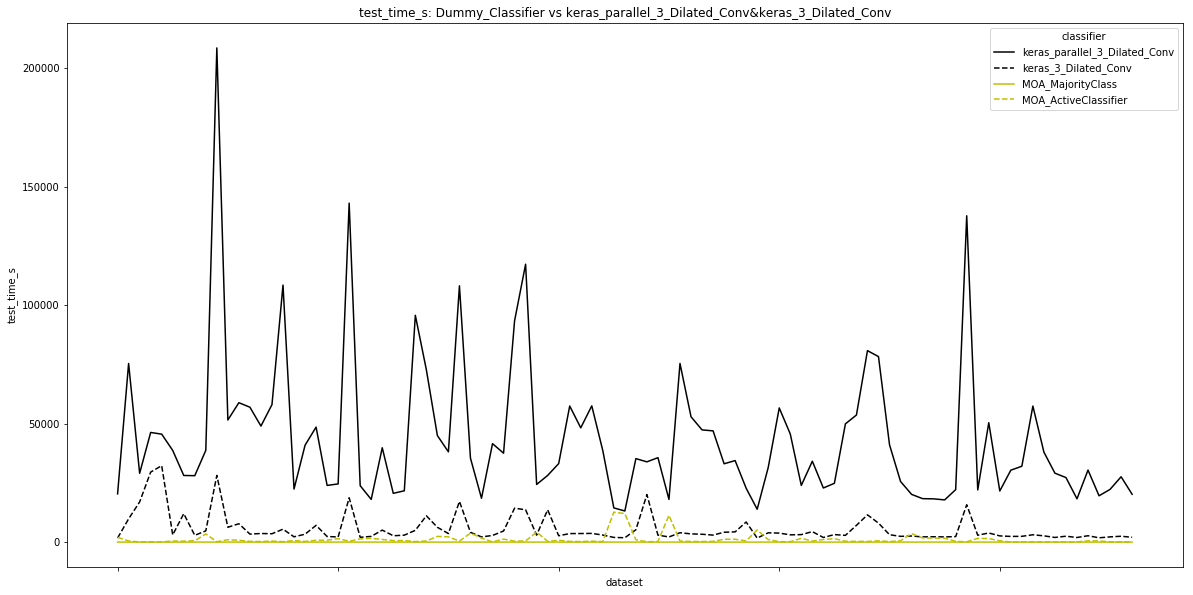

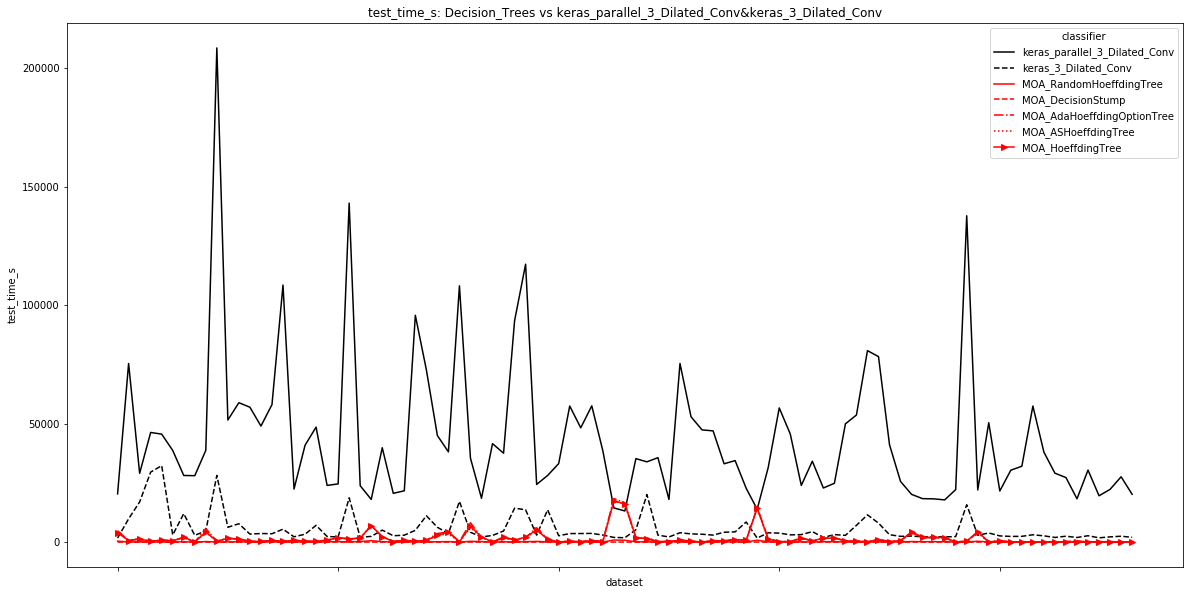

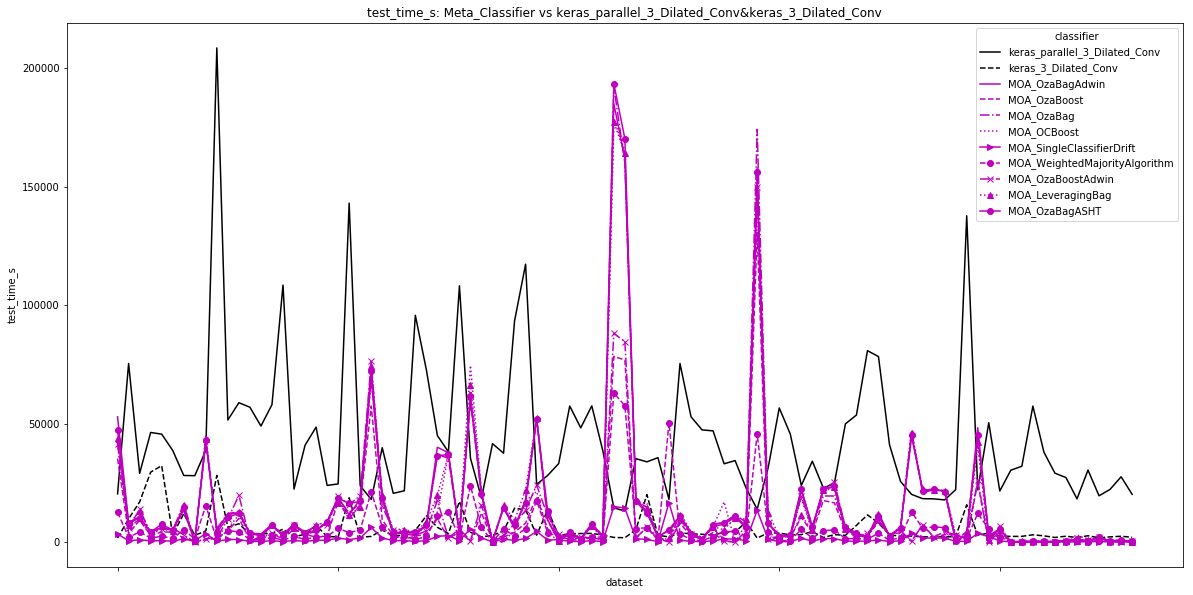

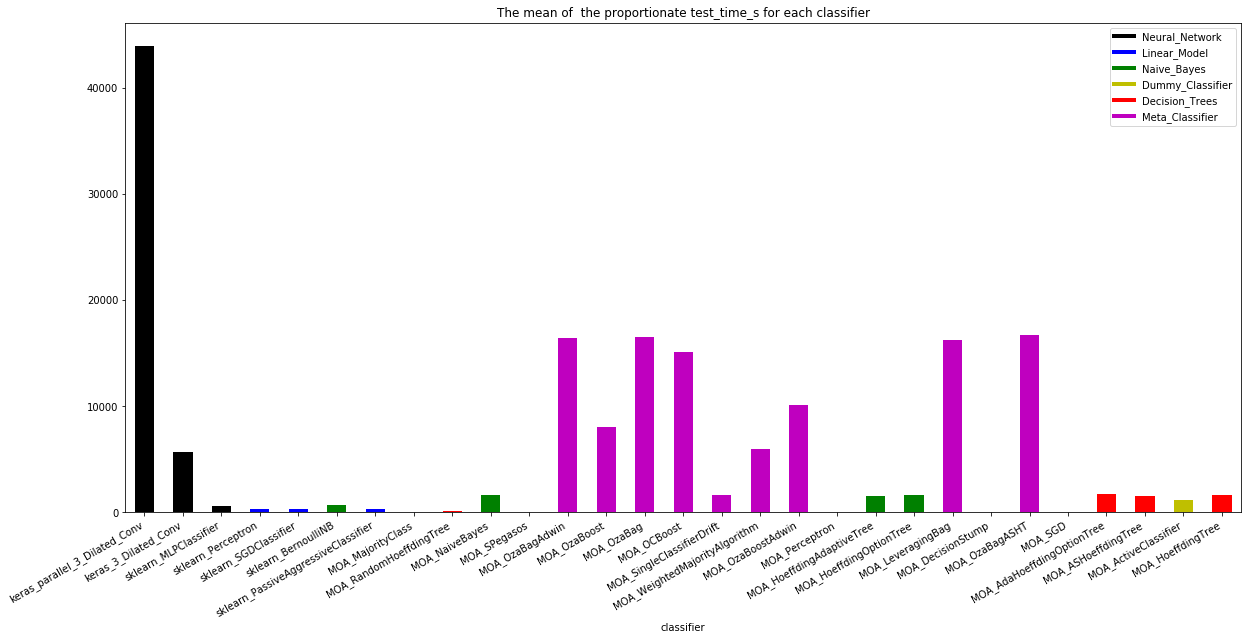

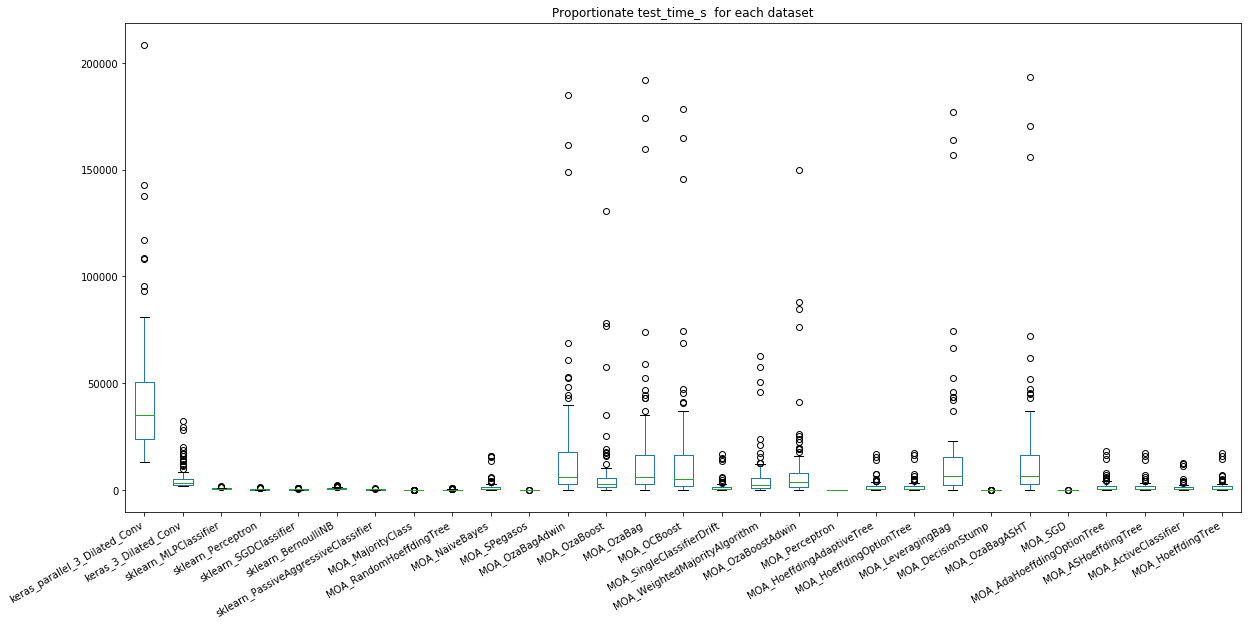

In [14]:
## Plot
ax = metrics_table_proportionate.plot(figsize=(20,10),   style=style, title= 'Proportionate '+_METRIC+' for each dataset' )
ax.set_ylabel(_METRIC)
ax.get_figure().savefig(directory+'plot_prop.png')
plt.show()

ax_log = metrics_table_proportionate.plot(figsize=(20,10),   style=style, title= 'Proportionate '+_METRIC+' for each dataset (log scaled)' , logy=True)
ax_log.set_ylabel(_METRIC+' (log)')
ax_log.get_figure().savefig(directory+'plot_log_prop.png')
plt.show()

pdf_img_ls = [directory+'plot_prop.png', directory+'plot_log_prop.png']

for family in family_label.keys():
    classifiers_to_plot = [classifier for (classifier,f) in classifier_family.items() if f==family or classifier in classifier_to_compare]
    color_aux = [family_color[classifier_family[classifier]] for classifier in classifiers_to_plot]
    line_aux = [line_style[family_classifier[classifier_family[classifier]].index(classifier)] for classifier in classifiers_to_plot]
    style_aux = [c+s for c,s in list(zip(color_aux,line_aux))]
    metrics_table_aux = metrics_table_proportionate[classifiers_to_plot]
    ax = metrics_table_aux.plot(figsize=(20,10), style=style_aux, title= _METRIC+': '+family_label[family]+' vs '+'&'.join(classifier_to_compare) )
    ax.set_ylabel(_METRIC)
    ax.get_figure().savefig(directory + 'plot_' + family +'_prop.png')
    plt.show()
    pdf_img_ls.append(directory + 'plot_' + family +'_prop.png')

## Bar plot (mean)
legend = [Line2D([0], [0], color=c, lw=4, label=family_label[f]) for f,c in family_color.items()]

ax = metrics_table_proportionate.mean().plot.bar(figsize=(20,10), color=color, title= 'The mean of  the proportionate '+_METRIC+' for each classifier')
ax.legend(handles=legend)
ax.get_figure().autofmt_xdate()
ax.get_figure().savefig(directory+'mean_prop.png')
plt.show()
pdf_img_ls = pdf_img_ls + [directory+'mean_prop.png']
                           
#ax_log = metrics_table_proportionate.mean().plot.bar(figsize=(20,10), color=color, logy=True, title= 'The mean of  the proportionate '+_METRIC+' for each classifier (log scaled)')
#ax_log.legend(handles=legend)
#ax_log.get_figure().autofmt_xdate()
#ax_log.get_figure().savefig(directory+'mean_log_prop.png')
#plt.show()
#pdf_img_ls = pdf_img_ls + [directory+'mean_log_prop.png']

## Box Plot 
ax = metrics_table_proportionate.plot.box(figsize=(20,10), title= 'Proportionate '+_METRIC+'  for each dataset')
ax.get_figure().autofmt_xdate()
ax.get_figure().savefig(directory+'box_prop.png')
plt.show()
pdf_img_ls = pdf_img_ls + [directory+'box_prop.png']
                           
#ax_log = metrics_table_proportionate.plot.box(figsize=(20,10), logy=True, title= 'Proportionate '+_METRIC+'  for each dataset (log scaled)')
#ax_log.get_figure().autofmt_xdate()
#ax_log.get_figure().savefig(directory+'box_log_prop.png')
#plt.show()
#pdf_img_ls = pdf_img_ls +  [directory+'box_log_prop.png']

## Save plots as pdf

In [15]:
pdf_img_ls = [Image.open(i).convert('RGB') for i in pdf_img_ls]
pdf_filename = directory+_METRIC+'_prop.pdf'
first = pdf_img_ls[0].copy()
first.save(pdf_filename,"PDF", resolution=100.0, save_all=True, append_images=pdf_img_ls[1:])
pdf_img_ls = []